In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML

In [2]:
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [3]:
df = pd.read_csv('ngdp.csv')
df.head()

,Financial Year,Agriculture & Allied Services (in Rs. Cr.) at 2004-05 Prices,Agriculture (in Rs. Cr.) at 2004-05 Prices,Industry (in Rs. Cr.) at 2004-05 Prices,Mining and Quarrying (in Rs. Cr.) at 2004-05 Prices,Manufacturing (in Rs. Cr.) at 2004-05 Prices,Services (in Rs. Cr.) at 2004-05 Prices
0,1951-52,147216.000,118877.00,47768.000,5772.000,25889.0,84799.000
1,1951-52,147225.286,118886.89,47767.942,5772.266,25890.8,84804.278
2,1951-52,147234.572,118896.78,47767.884,5772.532,25892.6,84809.556
3,1951-52,147243.858,118906.67,47767.826,5772.798,25894.4,84814.834
4,1951-52,147253.144,118916.56,47767.768,5773.064,25896.2,84820.112


### Color, Labels

We'll user `colors` and `group_lk` to add color to the bars.

In [40]:
colors = dict(zip(
    ["Agri Services", "Agriculture", "Industry", "Mining", "Manufacturing", "Services"],
    
    ["#f37121", "#438a5e", "#ffbd69", "#1dd3bd", "#b83b5e", "#c70039"]
))
names = dict(zip(
    [
     "Agriculture & Allied Services (in Rs. Cr.) at 2004-05 Prices",
     "Agriculture (in Rs. Cr.) at 2004-05 Prices",
     "Industry (in Rs. Cr.) at 2004-05 Prices",
     "Mining and Quarrying (in Rs. Cr.) at 2004-05 Prices",
     "Manufacturing (in Rs. Cr.) at 2004-05 Prices",
    "Services (in Rs. Cr.) at 2004-05 Prices"],
    ["Agri Services", "Agriculture", "Industry", "Mining", "Manufacturing", "Services"]
))

In [41]:
dff = df[df['Financial Year'] == '1952-53']


cols = [
     "Agriculture & Allied Services (in Rs. Cr.) at 2004-05 Prices",
     "Agriculture (in Rs. Cr.) at 2004-05 Prices",
     "Industry (in Rs. Cr.) at 2004-05 Prices",
     "Mining and Quarrying (in Rs. Cr.) at 2004-05 Prices",
     "Manufacturing (in Rs. Cr.) at 2004-05 Prices",
    "Services (in Rs. Cr.) at 2004-05 Prices"]

bar_names = ["Agri Services", "Agriculture", "Industry", "Mining", "Manufacturing", "Services"]

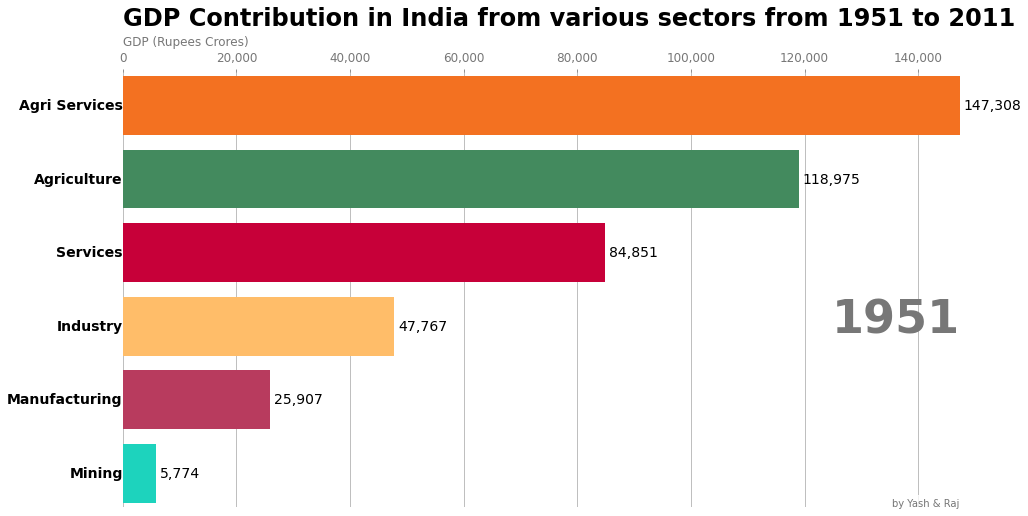

In [42]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(idx):
    dff = df.iloc[idx]
    fin_year = dff['Financial Year']
    
    values = [int(dff[c]) for c in cols]
    sorted_data = sorted(zip(values, bar_names), key=lambda x: x[0], reverse=False)
#     print(sorted_data)
    
    values = [s[0] for s in sorted_data]
    col = [s[1] for s in sorted_data]
    ax.clear()
    ax.barh(cols, values, color=[colors[x] for x in col])
    
    dx = max(values)/200
    for i, (value, name) in enumerate(zip(values, col)):
        ax.text(0, i,     name,           size=14, weight=600, ha='right', va='center')
#         ax.text(value-dx, i-.25, name, size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
        
    ax.text(1, 0.4, fin_year.split('-')[0], transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'GDP (Rupees Crores)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'GDP Contribution in India from various sectors from 1951 to 2011',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'by Yash & Raj', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
draw_barchart(10)



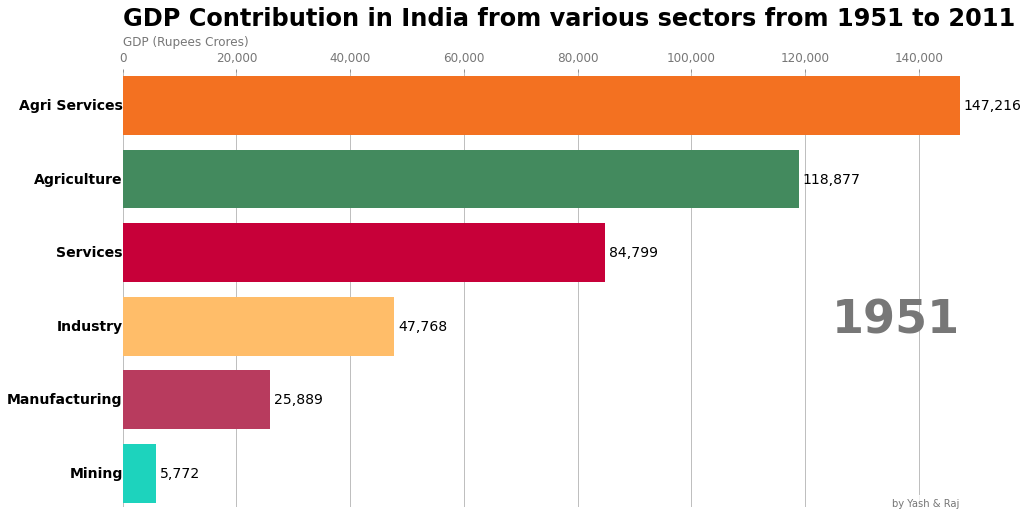

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=list(range(0, len(df), 2)))
# HTML(animator.to_jshtml())
# or use animator.to_html5_video() or animator.save()

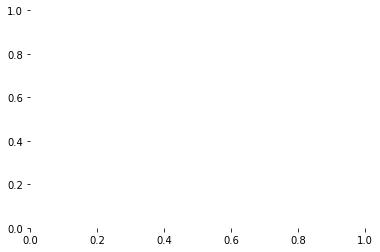

In [44]:
animator.save('gdp_clean_lengthy_500_2_48.mp4', fps=48)

/Users/rajamohanreddybollavaram/opt/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


ValueError: Invalid file object: <_io.BufferedReader name=79>

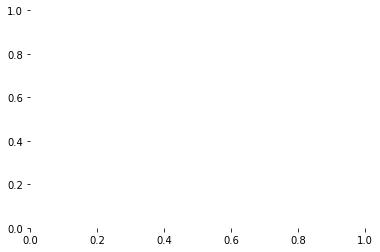

In [10]:
animator.to_html5_video('gdp.mp4')